# Plot the power spectra of the input components

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from fgbuster.observation_helpers import get_instrument, standardize_instrument, get_observation

#### Get some input frequency maps per each component

In [2]:
# General parameters
NSIDE = 64
cmb_model = 'c1'
dust_model = 'd0'
synch_model = 's0'
fgs_model = dust_model+synch_model
model = cmb_model+fgs_model

instr_name = 'LiteBIRD'
# get instrument from public database
instr_ = get_instrument(instr_name)
instrument = standardize_instrument(instr_)

# get input dust
input_dust_maps = get_observation(instrument, dust_model, nside=NSIDE, noise=False)

# get input synch
input_synch_maps = get_observation(instrument, synch_model, nside=NSIDE, noise=False)

# get input cmb
input_cmb_maps = get_observation(instrument, cmb_model, nside=NSIDE, noise=False)

NameError: name 'get_instrument' is not defined

#### Plot spectra of input components

In [ ]:
# frequency at which we get the final components
ind_final_freq = 6
final_freq = instrument.frequency[ind_final_freq]
print('Final freq: ', final_freq)

Final freq:  100.0


In [ ]:
lmin = 2
lmax = 3*NSIDE
ell = np.arange(lmin, lmax + 1, 1)

In [ ]:
input_dust_ps = hp.anafast(input_dust_maps[ind_final_freq], lmax=lmax, pol=True)[:, lmin:]
input_synch_ps = hp.anafast(input_synch_maps[ind_final_freq], lmax=lmax, pol=True)[:, lmin:]
input_cmb_ps = hp.anafast(input_cmb_maps[ind_final_freq], lmax=lmax, pol=True)[:, lmin:]

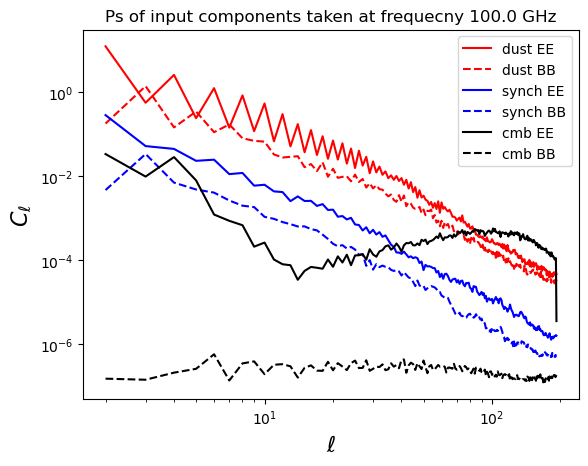

In [ ]:
plt.plot(ell, input_dust_ps[1], 'r', label='dust EE')
plt.plot(ell, input_dust_ps[2], 'r--', label='dust BB')
plt.plot(ell, input_synch_ps[1], 'b', label='synch EE')
plt.plot(ell, input_synch_ps[2], 'b--', label='synch BB')
plt.plot(ell, input_cmb_ps[1], 'k', label='cmb EE')
plt.plot(ell, input_cmb_ps[2], 'k--', label='cmb BB')
plt.title('Ps of input components taken at frequecny %s GHz' %str(final_freq))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$', fontsize=16)
plt.ylabel(r'$C_{\ell}$', fontsize=16)
plt.legend()
